In [9]:
import csv
import numpy as np

In [3]:
fields = ['timestamp','torque_on','target_ring','target_center','velocity_limit_a','velocity_limit_b','torque_limit_a','torque_limit_b']

In [4]:
#let's generate a simple sinus on ring for 5s at 1kHz the very inneficient way

In [5]:
def generate_rpy(timestamp, ring, center, torque=True,vel_limit_a=1.0, vel_limit_b=1.0, torque_limit_a=1.0,torque_limit_b=1.0):
        #the velocity and torque limits are in 100% of the maximum allowed
        return [timestamp, str(torque).lower(), ring, center, vel_limit_a, vel_limit_b, torque_limit_a, torque_limit_b]


In [10]:
AMP=np.radians(20.0) #amplitude of 20°
FREQ=1.0 #frequency of 1Hz

#the created file will be located where you launched jupyter
with open('test_sinus_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,ring=np.sin(2.0*np.pi*FREQ*it/1000.0),center=0.0))

In [11]:
#let's generate a step, 0° until t=STEP_TIME then yaw=AMP
AMP=np.radians(20.0) #amplitude of 20°
STEP_TIME=1.0 #step will be on from 1s

#the created file will be located where you launched jupyter
with open('test_step_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,ring=(AMP if it/1000.0>=STEP_TIME else 0.0),center=0.0))

In [10]:
#To plot a csv
import matplotlib.pyplot as plt
import pandas as pd


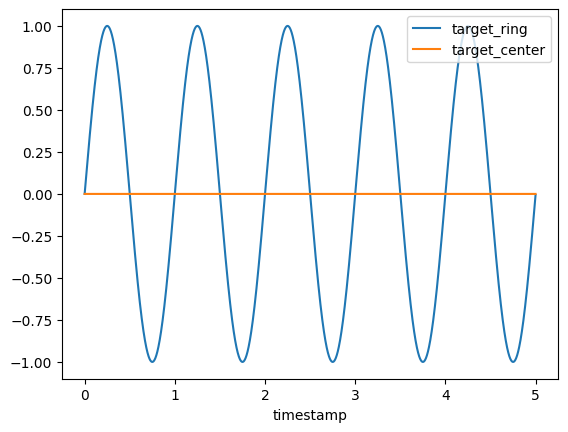

In [15]:
df = pd.read_csv('test_sinus_input.csv')
df.plot(x='timestamp', y=['target_ring','target_center'])
plt.show()


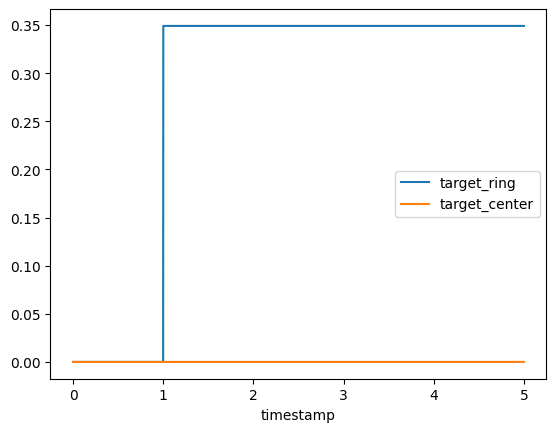

In [16]:
df = pd.read_csv('test_step_input.csv')
df.plot(x='timestamp', y=['target_ring','target_center'])
plt.show()

In [20]:
AMP=np.radians(1*180.0) 
FREQ_SLOW=1.0/20.0 
FREQ_MID=1.0/15.0 
FREQ_FAST=1.0/10.0 
with open('test_breakin_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    t=0
    for it in range(20000):
        writer.writerow(generate_rpy(timestamp=t,ring=AMP*(np.cos(2.0*np.pi*FREQ_SLOW*t)-1.0),center=2.0*AMP*(np.cos(2.0*np.pi*FREQ_SLOW*t)-1.0)))
        t+=0.001
    t0=t
    for it in range(15000):
        writer.writerow(generate_rpy(timestamp=t,ring=AMP*(np.cos(2.0*np.pi*FREQ_MID*(t-t0))-1.0),center=2.0*AMP*(np.cos(2.0*np.pi*FREQ_MID*(t-t0))-1.0)))
        t+=0.001
    t0=t
    for it in range(10000):
        writer.writerow(generate_rpy(timestamp=t,ring=AMP*(np.cos(2.0*np.pi*FREQ_FAST*(t-t0))-1.0),center=2.AMP*(np.cos(2.0*np.pi*FREQ_FAST*(t-t0))-1.0)))
        t+=0.001

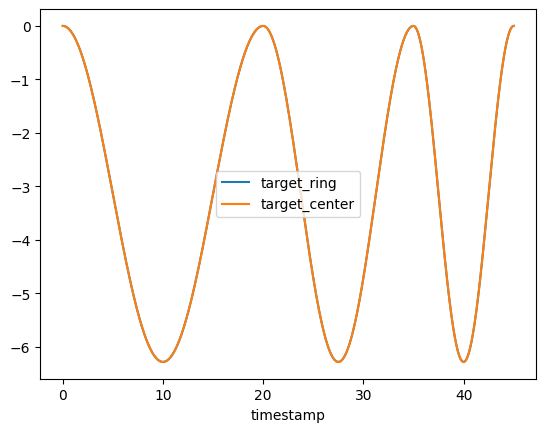

In [21]:

df = pd.read_csv('test_breakin_input.csv')
df.plot(x='timestamp', y=['target_ring','target_center'])
plt.show()

In [22]:
AMP=np.radians(180.0)
FREQ=0.2 

# +/- 180° in ring in 5s
with open('test_ring_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    t=0
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=t,ring=AMP*(np.cos(2.0*np.pi*FREQ*t)-1.0),center=0.0))
        t+=0.001

In [23]:
AMP=np.radians(20.0)
FREQ=0.4 

#+/- 40° in center in 5s
with open('test_center_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    t=0
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=t,ring=0.0,center=AMP*(np.cos(2.0*np.pi*FREQ*t)-1.0)))
        t+=0.001


In [24]:
with open('test_zero_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    t=0
    for it in range(10000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=t,ring=0.0,center=0.0))
        t+=0.001